# Business Probelem
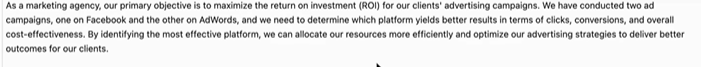

# Research Question
Which ad platform is more effective in terms of conversions,clicks, and overall cost_effectiveness?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarning('ignore')


# Data Description
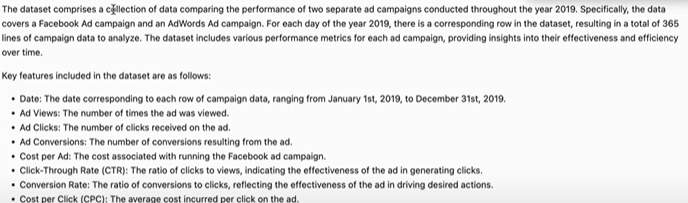

In [2]:
# loading the dataset
df=pd.read_csv('marketing_campaign.csv')

In [3]:
# data overview
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [4]:
df.tail()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
995,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98
999,2024-12-20,FACEBOOK AD,1968,57,9,153,2.90,15.79,2.68,ADWORD AD,4876,67,3,113,1.37,4.48,1.69


In [4]:
# row and columns of the data
df.shape

(1000, 17)

In [5]:
# datatype of the dataset
df.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

In [6]:
# converting date to datetime
df['date_of_campaign']=pd.to_datetime(df['date_of_campaign'])

In [7]:
# descriptive statis of campaign
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-04 07:13:26.399999744,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
min,2021-12-22 00:00:00,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2022-10-07 18:00:00,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2023-07-20 12:00:00,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2024-03-24 00:00:00,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,2024-12-20 00:00:00,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846


# Comparing campaigns performance

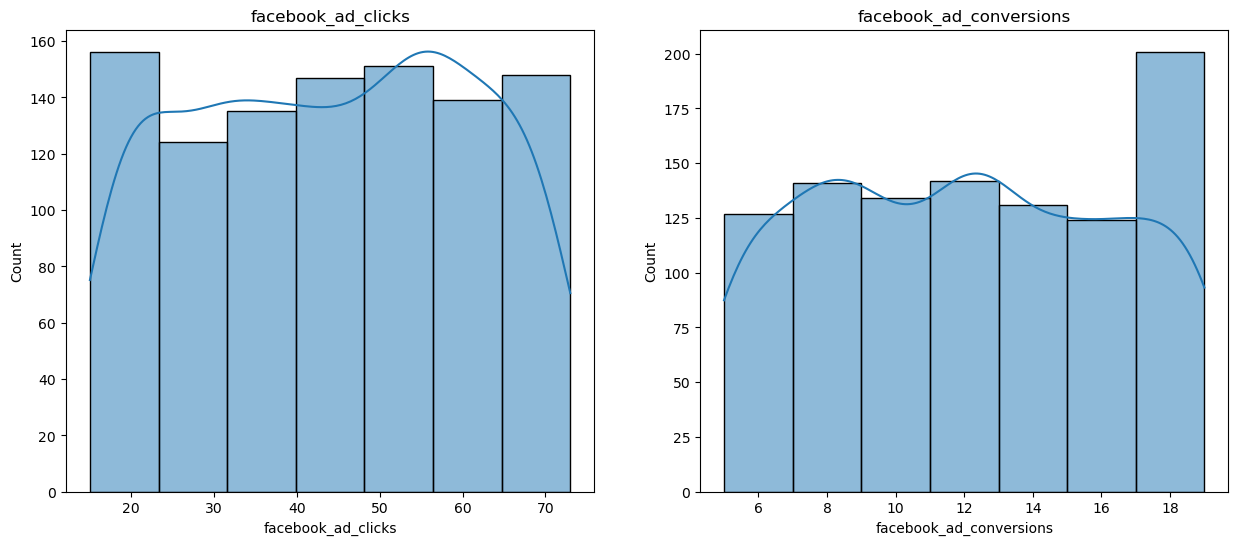

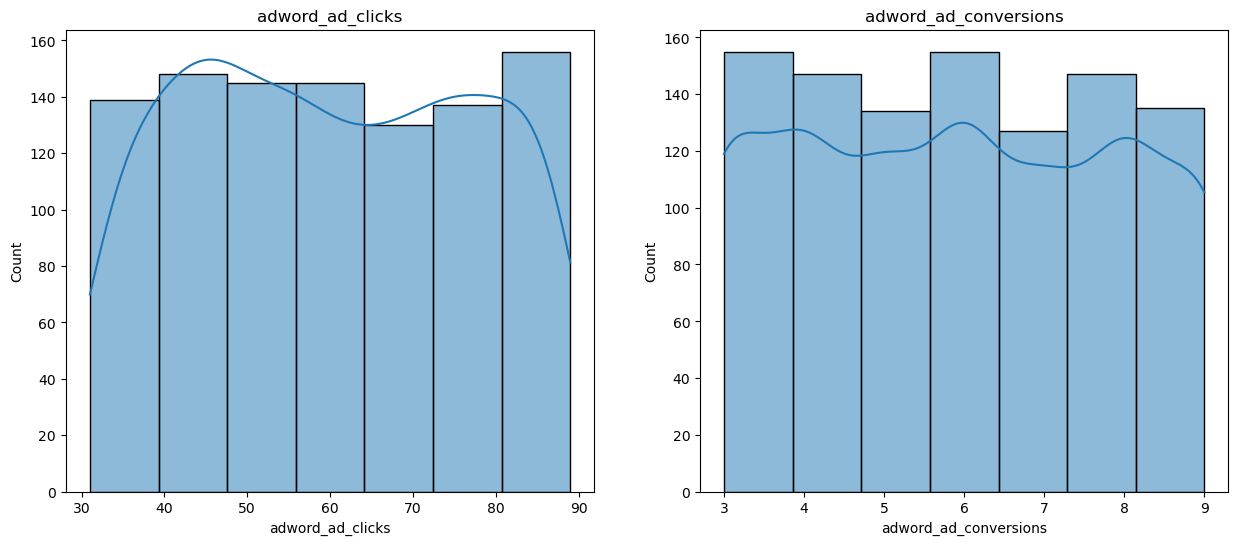

In [5]:
# distribution of the conversion and click
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('facebook_ad_clicks')
sns.histplot(df['facebook_ad_clicks'],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2) 
plt.title('facebook_ad_conversions')
sns.histplot(df['facebook_ad_conversions'],bins=7,edgecolor='k',kde=True)
plt.show()



plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('adword_ad_clicks')
sns.histplot(df['adword_ad_clicks'],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('adword_ad_conversions')
sns.histplot(df['adword_ad_conversions'],bins=7,edgecolor='k',kde=True)
plt.show()

all the histogram are showing somewhat symmetrical shape. this symmerty shape suggest that the number of click and conversion is relatively evenly distributed. there are not many click or conversion that are outlier on either the high or low end.

* how frequently do we observe days with high numbers of conversions compare to days with low number of conversions?

In [6]:
df['facebook_ad_conversions']

0      14
1       9
2      15
3       9
4      12
       ..
995     8
996    13
997    19
998    19
999     9
Name: facebook_ad_conversions, Length: 1000, dtype: int64

In [7]:
# creating function to calculate the category for the conversion
def create_conversion_category(conversion_col):
    category=[]
    for conversion in df[conversion_col]:
        if conversion<6:
            category.append('less than 6')
        elif 6<= conversion <11:
            category.append('6-10')
        elif 11<= conversion <16:
            category.append('11-15')
        else:
            category.append('more than 15')
    return category

# apply function of diffrent campaign's conversion
df['facebook_conversions_category'] = create_conversion_category('facebook_ad_conversions')
df['adword_conversions_category'] = create_conversion_category('adword_ad_conversions')




In [8]:
df[['facebook_ad_conversions','facebook_conversions_category','adword_ad_conversions','adword_conversions_category']].head()

,facebook_ad_conversions,facebook_conversions_category,adword_ad_conversions,adword_conversions_category
0,14,11-15,9,6-10
1,9,6-10,6,6-10
2,15,11-15,9,6-10
3,9,6-10,3,less than 6
4,12,11-15,4,less than 6


In [9]:
df['facebook_conversions_category'].value_counts()

facebook_conversions_category
11-15           341
6-10            337
more than 15    257
less than 6      65
Name: count, dtype: int64

In [10]:
facebook=pd.DataFrame(df['facebook_conversions_category'].value_counts()).reset_index().rename(columns={'facebook_conversions_category':'Category'})

In [11]:
facebook

,Category,count
0,11-15,341
1,6-10,337
2,more than 15,257
3,less than 6,65


In [12]:
df['adword_conversions_category'].value_counts()

adword_conversions_category
6-10           564
less than 6    436
Name: count, dtype: int64

In [13]:
adword=pd.DataFrame(df['adword_conversions_category'].value_counts()).reset_index().rename(columns={'adword_conversions_category':'Category'})

In [14]:
adword

,Category,count
0,6-10,564
1,less than 6,436


In [15]:
category_df=pd.merge(facebook,adword,on='Category',how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,11-15,341,0.0
1,6-10,337,564.0
2,less than 6,65,436.0
3,more than 15,257,0.0


In [16]:
category_df=category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,more than 15,257,0.0
1,6-10,337,564.0
0,11-15,341,0.0
2,less than 6,65,436.0


In [17]:
X_axis=np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

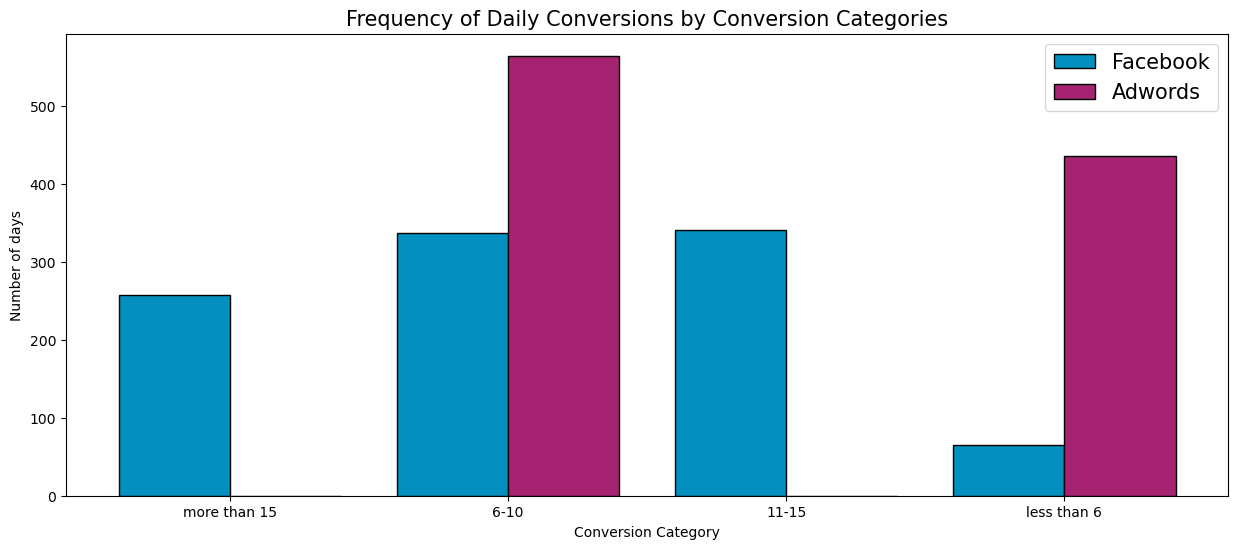

In [18]:
# Create the plot
X_axis = np.arange(len(category_df))
plt.figure(figsize=(15, 6))
# Plot Facebook bars
plt.bar(
    X_axis - 0.2,
    category_df['count_x'],
    0.4,
    label='Facebook',
    color='#0390BE',
    linewidth=1,
    edgecolor='k'
)
# Plot Adwords bars
plt.bar(
    X_axis + 0.2,
    category_df['count_y'],
    0.4,
    label='Adwords',
    color='#A62372',
    linewidth=1,
    edgecolor='k'
)

# Customize the plot
plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories', fontsize=15)
plt.legend(fontsize=15)
plt.show()

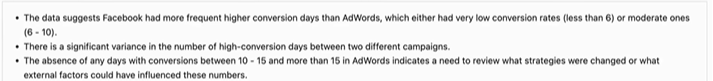

do more clicks on the really lead to more sales

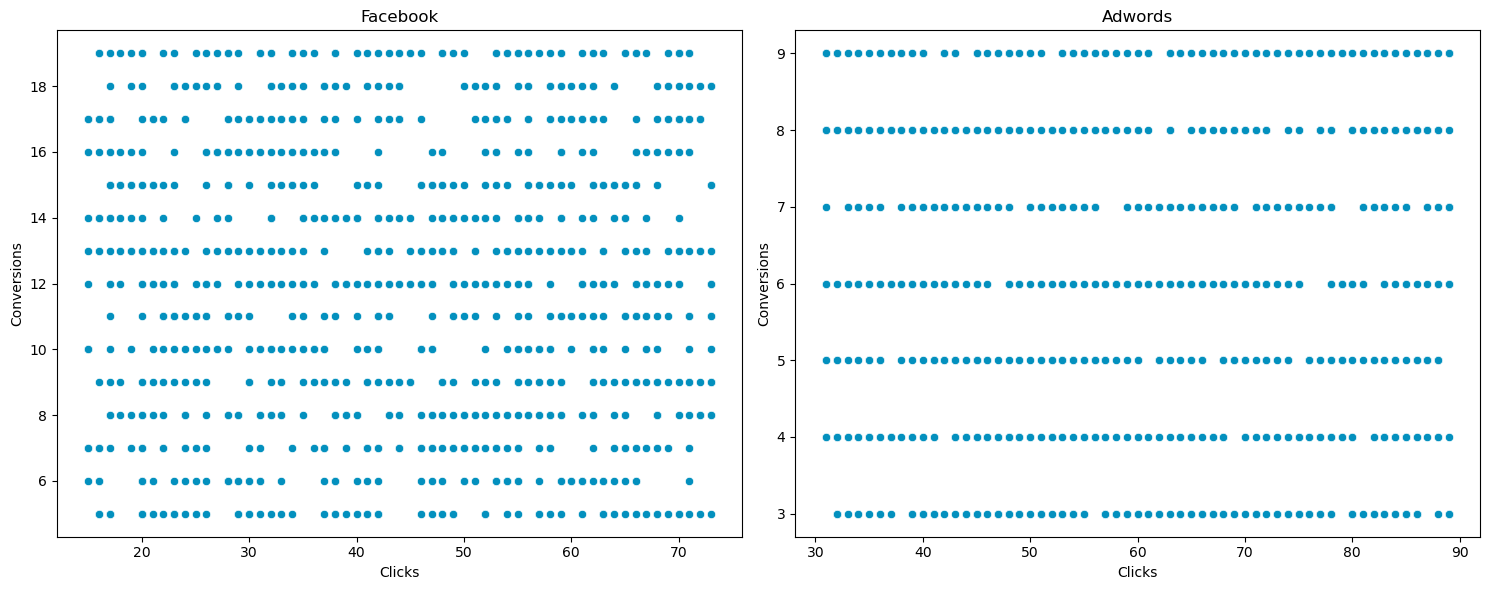

In [19]:
# Create the scatter plots
plt.figure(figsize=(15, 6))
# Subplot 1: Facebook Ads
plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.scatterplot(
    x='facebook_ad_clicks',
    y='facebook_ad_conversions',
    data=df,
    color='#0390BE'
)
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# Subplot 2: AdWords Ads
plt.subplot(1, 2, 2)
plt.title('Adwords')
sns.scatterplot(
    x='adword_ad_clicks',
    y='adword_ad_conversions',
    data=df,
    color='#0390BE'
)
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.tight_layout()
plt.show()

In [20]:
# Calculate and print the correlation coefficients
facebook_corr = df[['facebook_ad_conversions', 'facebook_ad_clicks']].corr()

facebook_corr

,facebook_ad_conversions,facebook_ad_clicks
facebook_ad_conversions,1.000000,-0.005009
facebook_ad_clicks,-0.005009,1.000000


In [21]:
adword_corr = df[['adword_ad_conversions', 'adword_ad_clicks']].corr()
adword_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.004162
adword_ad_clicks,0.004162,1.000000


In [22]:
print('Correlation Coeff \n---------------------')
print(f"facebook : {round(facebook_corr.values[0, 1], 2)}")
print(f"adwords : {round(adword_corr.values[0, 1], 2)}")

Correlation Coeff 
---------------------
facebook : -0.01
adwords : 0.0


A correlation coefficient of 0.01 shows a strong positive linear relationship between clicks on Facebook ads and sales. This means as Facebook ad clicks increase, sales also tend to increase. This strong correlation suggests that Facebook ads are highly effective in driving sales, as a significant portion of the variation in sales can be explained by the variation in clicks. Increasing investment or optimizing Facebook ads could potentially lead to higher sales.

A correlation coefficient of 0.00 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While the relationship is still positive, it is not as strong as the one observed with Facebook ads. The moderate correlation suggests that while AdWords contributes to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

# Hypothesis testing

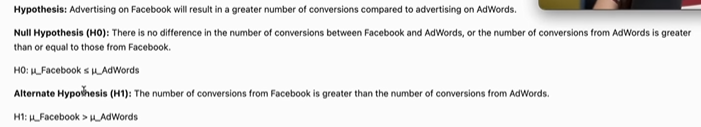

In [30]:
print('Mean Conversion \n---------------------')
print('facebook :', round(df['facebook_ad_conversions'].mean(), 2))
print('adwords :', round(df['adword_ad_conversions'].mean(),2))

Mean Conversion 
---------------------
facebook : 11.98
adwords : 5.93


In [36]:
t_stats,p_value = st.ttest_ind(a=df['facebook_ad_conversions'],b=df['adword_ad_conversions'],equal_var=False)
print('\nT statistic',t_stats ,'\np-value',p_value)

# /comparing the p value with the significance value,reject the null hypothesis
if p_value< 0.05:
    print("\np-value is less than significance value,reject the null hypothesis")
else:
    print("\np-value is greater than significance value,reject the null hypothesis")
    


T statistic 40.25906231407935 
p-value 6.886351887267426e-237

p-value is less than significance value,reject the null hypothesis


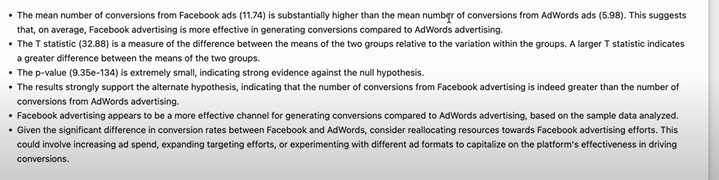

# Regression Analysis

what will happen when i do go with the facebook ad? how many facebook ad conversion can i expect given a certain number of facebook ad clicks

In [37]:
# independent variable
X = df[['facebook_ad_clicks']]

# dependent variable
y = df[['facebook_ad_conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):', round(r2,2), '%')
print('Mean Squared Error:', round(mse,2))




Accuracy (R2 Score): 0.0 %
Mean Squared Error: 18.46


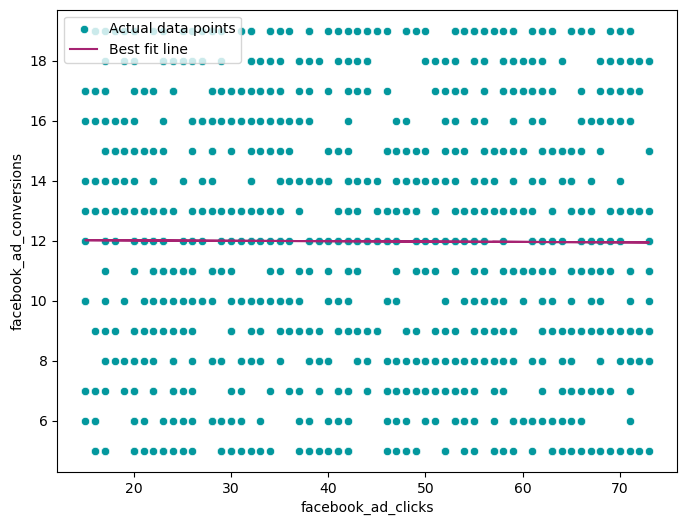

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['facebook_ad_clicks'], y = df['facebook_ad_conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['facebook_ad_clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()



In [42]:
print(f'For{50} Clicks,Expected Conversion:{round(reg_model.predict([[50]])[0][0],2)}')
print(f'For{80} Clicks,Expected Conversion:{round(reg_model.predict([[50]])[0][0],2)}')

For50 Clicks,Expected Conversion:11.97
For80 Clicks,Expected Conversion:11.97


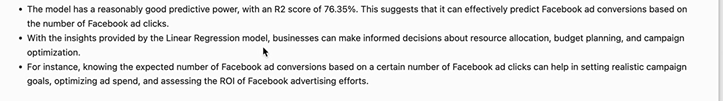

# Analyzing facebook campaign metrics over time

In [43]:
# cleaning data (removing unwanted symbols from the columns and converting them to numerical columns)
df['facebook_ctr (Clicks / View)'] = df['facebook_ctr (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['facebook_ctr (Conversions / Clicks)'] = df['facebook_ctr (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['facebook_cost_per_click (Ad Cost / Clicks)'] = df['facebook_cost_per_click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['facebook_cost_per_ad'] = df['facebook_cost_per_add'].apply(lambda x: float(x[1:]))




KeyError: 'facebook_ctr (Clicks / View)'

In [44]:
# filtering for facebook campaign
df = df[['Date', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]
df.head()



KeyError: "None of [Index(['Date', 'Facebook Ad Views', 'Facebook Ad Clicks',\n       'Facebook Ad Conversions', 'Cost per Facebook Ad',\n       'Facebook Click-Through Rate (Clicks / View)',\n       'Facebook Conversion Rate (Conversions / Clicks)',\n       'Facebook Cost per Click (Ad Cost / Clicks)'],\n      dtype='object')] are in the [columns]"

In [45]:
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click,facebook_conversions_category,adword_conversions_category
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77,11-15,6-10
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74,6-10,6-10
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92,11-15,6-10
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78,6-10,less than 6
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57,11-15,less than 6


In [47]:
# filtering for facebook campaign
df = df[['date_of_campaign', 'facebook_ad_campaign',
       'facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions',
       'facebook_cost_per_ad',
       'facebook_ctr',
       'facebook_conversion_rate','facebook_cost_per_click']]
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95


at what time the month or days of the week do we observe the conversion

In [48]:
# extracting month and week day from the date column
df['month'] = df['date_of_campaign'].dt.month
df['week'] = df['date_of_campaign'].dt.weekday

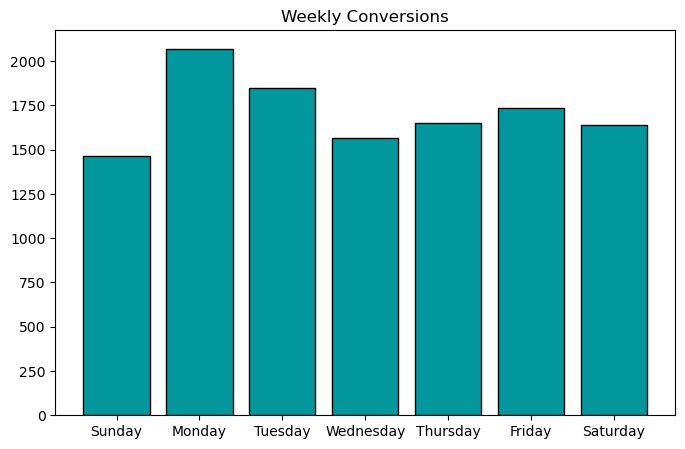

In [50]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby(['week'])[['facebook_ad_conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(week_names, weekly_conversion['facebook_ad_conversions'], color = '#03989E', edgecolor = 'k')
plt.show()



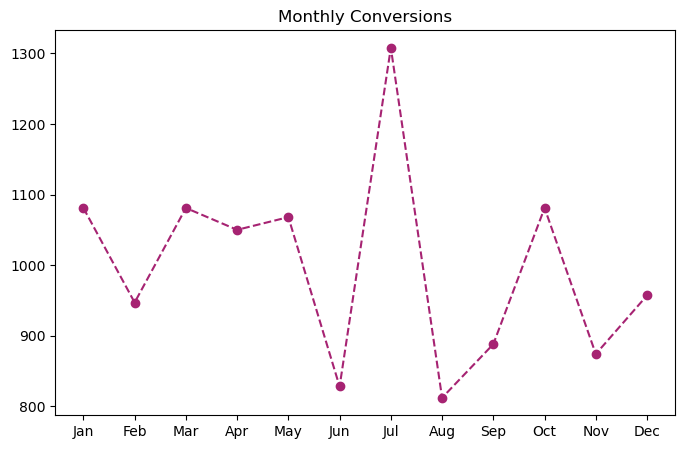

In [51]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby(['month'])[['facebook_ad_conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversion['facebook_ad_conversions'], '--o', color = '#A62372')
plt.show()

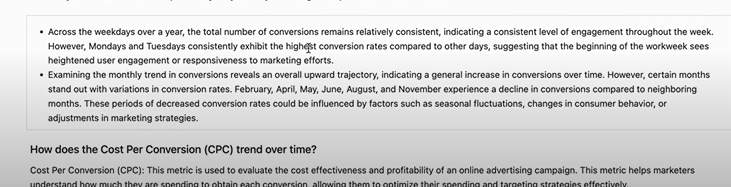

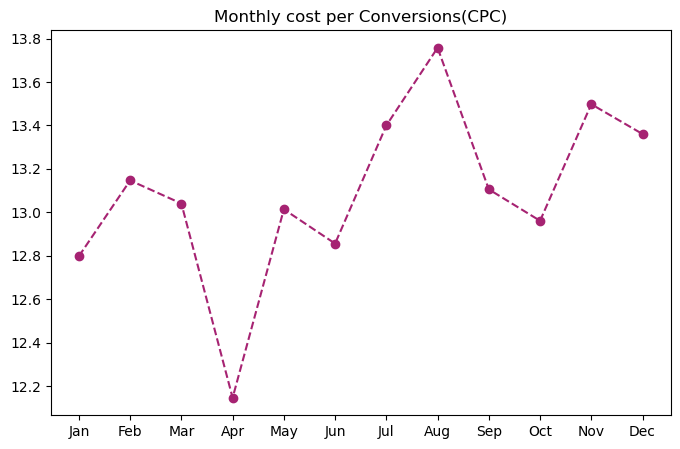

In [52]:
plt.figure(figsize=(8,5))
plt.title('Monthly cost per Conversions(CPC)')
monthly_df = df.groupby(['month'])[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['facebook_cost_per_conversion']=monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names, monthly_df['facebook_cost_per_conversion'], '--o', color = '#A62372')
plt.show()

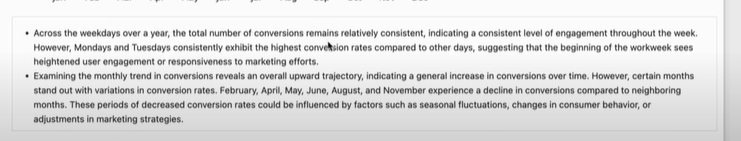


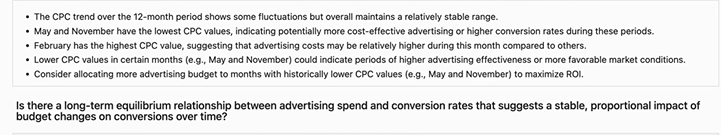

how does the cost per conversion(cpc) trend over time?
cpc : metric is used to evaluate the cost effectiveness and profitability of an online advertising. this mertics understand how much they are spending to obtain each conversion allowing them to optimize their spending and targeting strategies effectively.

In [ ]:
score, p_value, _ = coint(df['facebook_cost_per_ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\nP-value is less than significance value, Reject the null hypothesis")
else:
    print("\nP-value is greater than significance value, Accept the null hypothesis")

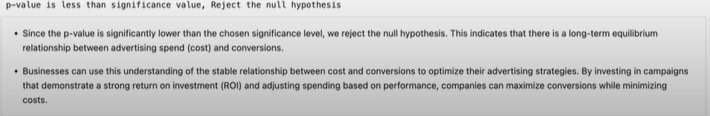